In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
for col in churn_data.columns:
    print(col)


customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [5]:
churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
churn_data.drop(columns=['customerID'],inplace=True)

In [7]:
churn_data.shape

(7043, 20)

In [8]:
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
churn_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


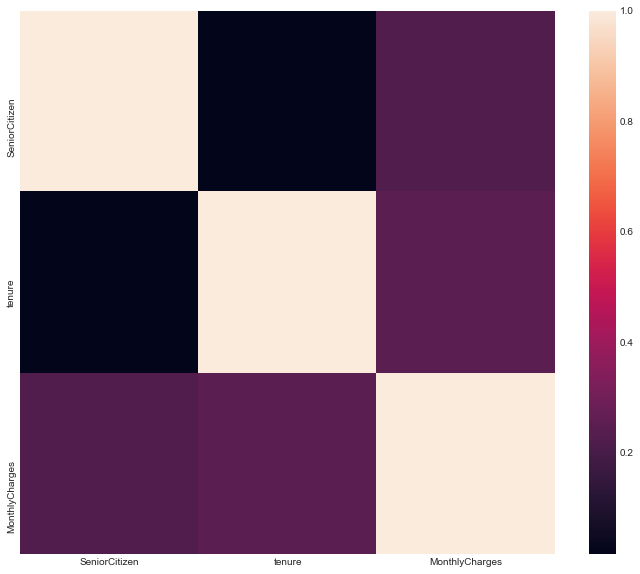

In [11]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(churn_data.corr());

In [12]:
 churn_data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [13]:
 churn_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

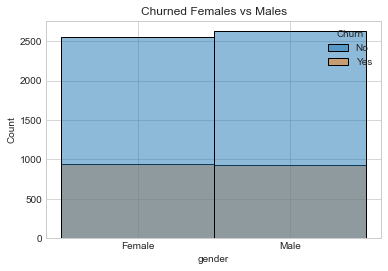

In [14]:
#plt.figure(figsize=(10,8))
plt.title('Churned Females vs Males')
sns.histplot(data=churn_data,x='gender',hue='Churn');

No     5174
Yes    1869
Name: Churn, dtype: int64

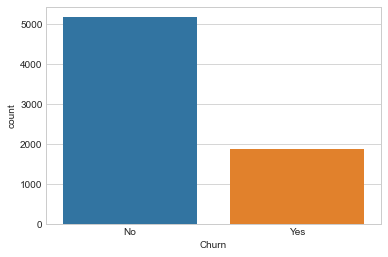

In [15]:
sns.countplot(x='Churn',data=churn_data);
churn_data.loc[:,"Churn"].value_counts()

In [16]:
print(type('gender'))

<class 'str'>


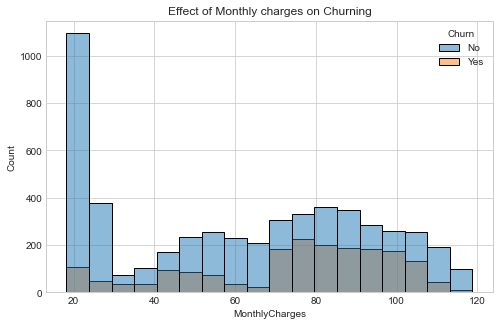

In [17]:
plt.figure(figsize=(8,5))
plt.title('Effect of Monthly charges on Churning')
sns.histplot(data=churn_data,x='MonthlyCharges',hue='Churn');

C:\Users\franc\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


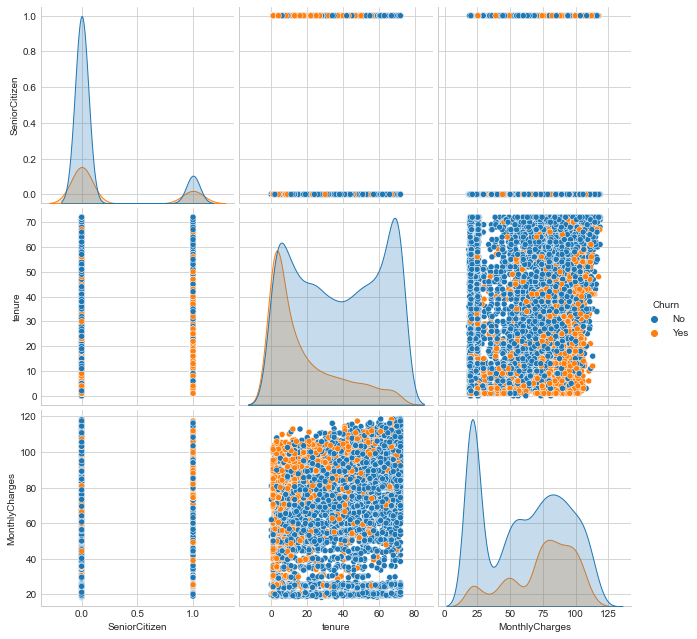

In [18]:
sns.pairplot(churn_data,hue='Churn',size=3);

In [19]:
churn_data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [20]:
churn_data.drop(columns=['TotalCharges'],inplace= True)

In [21]:
 churn_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [22]:
churn_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [23]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [24]:
nom_col = [0,6,7,9,16]
ordinal_col= [2,3,5,8,10,11,12,13,14,15]

In [25]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config



In [26]:
trans = make_column_transformer((OneHotEncoder(sparse=False),nom_col),\
                                 (OrdinalEncoder(),ordinal_col),\
                                 remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [0, 6, 7, 9, 16]),
                                ('ordinalencoder', OrdinalEncoder(),
                                 [2, 3, 5, 8, 10, 11, 12, 13, 14, 15])])

In [27]:
x= churn_data.iloc[:,0:18]
y=churn_data.Churn


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [29]:
x_train.shape

(4577, 18)

In [30]:
y_train.shape

(4577,)

In [31]:
x_test.shape

(2466, 18)

In [32]:
y_test.shape

(2466,)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
KNN= KNeighborsClassifier(9)
pipeKNN = make_pipeline(trans,KNN)

In [34]:
KNN

KNeighborsClassifier(n_neighbors=9)

In [35]:
pipeKNN

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [36]:
pipeKNN.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [37]:
predKNN = pipeKNN.predict(x_test)
predKNN

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(predKNN,y_test) *100

77.69667477696674

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


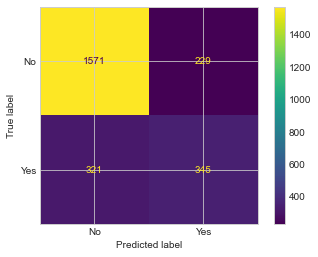

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeKNN,x_test,y_test);

In [40]:
y.value_counts(normalize= True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


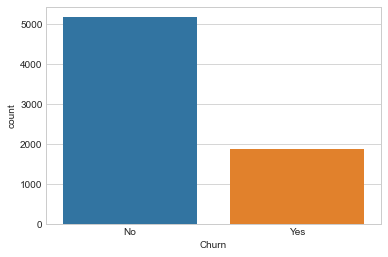

In [41]:
import seaborn as sns 
sns.countplot(y);

In [42]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
u_x,u_y =under.fit_resample(x,y)
u_y.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [44]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
over = RandomOverSampler()
o_x,o_y = over.fit_resample(x,y)
o_y.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [45]:
from imblearn.pipeline import make_pipeline
s=SMOTE()
n_pipe =make_pipeline(trans,s,KNN)
n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [46]:
n_pipe.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [48]:
pred_n =n_pipe.predict(x_test)
pred_n

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [49]:
accuracy_score(pred_n,y_test) *100

69.9918896999189

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


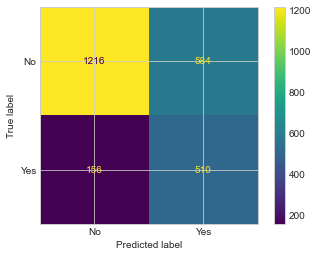

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(n_pipe,x_test,y_test);

In [53]:
from sklearn.linear_model import LogisticRegression as lr
algorithm_1 =lr(solver ='liblinear')
pipe_2 = make_pipeline(trans,algorithm_1)
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [54]:
pipe_2.fit(x_test,y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [55]:
pred_1 =pipe_2.predict(x_test)
pred_1

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [57]:
accuracy_score(pred_1,y_test) *100

80.41362530413625

In [59]:
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB(var_smoothing =1e-04)
from sklearn.pipeline import make_pipeline
pipe_GNB =make_pipeline(trans,GNB)
pipe_GNB

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 6, 7, 9, 16]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [2, 3, 5, 8, 10, 11, 12, 13,
                                                   14, 15])])),
                ('gaussiannb', GaussianNB(var_smoothing=0.0001))])

In [61]:
pred_GNB = pipe_GNB.predict(x_test)
pred_GNB

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.